# Applied Data Science and Machine Intelligence
## A program by IITM and TalentSprint
### Assignment __ : Back Propagation

## Learning Objectives

At the end of the experiment, you will be able to

* Understanding how back propagation happens in Computational Graphs
* understanding back propagation algoirthm in Neural Networks 

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M4_Assignment_13_SGD_and_its_variants_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://adsmi.iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



### 4a. Back Propagation in Computational Graphs

### Importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


### Computational Graphs

A computational graph is defined as a directed graph where the nodes correspond to mathematical operations. Computational graphs are a way of expressing and evaluating a mathematical expression.

#### Forward Pass
Forward pass is the procedure for evaluating the value of the mathematical expression represented by computational graphs. Doing forward pass means we are passing the value from variables in forward direction from the inputs to output.

In [ ]:
x = 2   #x,y and z are inputs to the graph
y = 4
z = 0.5
w = 2

u = x + y
v = z * w


b = u * v  # b is the output
print(b)

6.0


#### Back Propagation in Computational graphs


Backpropagation is useful for knowing how nodes that aren’t directly connected affect each other?

 Let’s consider how b is affected by x i.e. ∂b/∂x . If we change x at a speed of 1, u changes at a speed of 1. In turn, changing u, causes b to change at a speed of v. So b changes at a rate of v with respect to x.

The general rule is to sum over all possible paths from one node to the other, multiplying the derivatives on each edge of the path together.

As \$b = u * v $

$Using\ multiplication \ rule\ of\ differentiation$
\begin{equation*} \frac{∂b} {∂u} = u * \frac{∂v} {∂u} + v * \frac{∂u} {∂u} \end{equation*}

\begin{equation*} \frac{∂b} {∂u} = u * 0 + v * 1 \end{equation*}

\begin{equation*} \frac{∂b} {∂u} =  v \end{equation*}

$Similarly$ \begin{equation*} \frac{∂b} {∂v} = u \end{equation*}

$Now $

\begin{equation*} \frac{∂b} {∂x} =  \frac{∂b} {∂u} * \frac{∂u} {∂x} + \frac{∂b} {∂v} * \frac{∂v} {∂x} \end{equation*}


\begin{equation*} \frac{∂b} {∂x} =  v * 1 + u * 0 = v \end{equation*}


$Similarly $

\begin{equation*} \frac{∂b} {∂y} =  \frac{∂b} {∂u} * \frac{∂u} {∂y} + \frac{∂b} {∂v} * \frac{∂v} {∂y} = v * 1  + u * 0  \end{equation*}

\begin{equation*} \frac{∂b} {∂z} =  \frac{∂b} {∂u} * \frac{∂u} {∂z} + \frac{∂b} {∂v} * \frac{∂v} {∂z} = v * 0  + u * w  \end{equation*}

\begin{equation*} \frac{∂b} {∂w} =  \frac{∂b} {∂u} * \frac{∂u} {∂w} + \frac{∂b} {∂v} * \frac{∂v} {∂w} = v * 0  + u * z  \end{equation*}


$Given\ x = 2, y = 4, z = 0.5\ and\ w = 2 $

\begin{equation*} \frac{∂b} {∂x} =  v =  z*w = 1\end{equation*}

\begin{equation*} \frac{∂b} {∂y} =  v = 1\end{equation*}

\begin{equation*} \frac{∂b} {∂z} =  u*w =  12\end{equation*}

\begin{equation*} \frac{∂b} {∂w} =  u*z =  3\end{equation*}







### 4b. Back Propagation in Neural Networks

### Problem Statement: Implementing the Iris data using Backpropagation in Neural Networks

## Dataset

#### History

This is a multivariate dataset introduced by R.A.Fisher (Father of Modern Statistics) for showcasing linear discriminant analysis. This is arguably the best known dataset in Feature Selection literature.


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Description
The Iris dataset consists of 150 data instances. There are 3 classes (Iris Versicolor, Iris Setosa and Iris Virginica) each have 50 instances. 


For each flower we have the below data attributes 

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

To make our experiment easy we rename the classes  with numbers : 

    "0": setosa
    "1": versicolor
    "2": virginica

### Challenges

When we use the data with large number of features or dimensionality, models usually choke because

    1. Training time increases exponentially with number of features.
    2. Models have increasing risk of overfitting with increasing number of features.
    
To avoid the above mentioned problems while learning about data analysis, we use simple, well behaved, data that reduces the cognitive load, and makes it easier to debug as we are able to better comprehend the data we are working with.  

Hence, this is a good dataset to work on.

## Domain Information



Iris Plants are flowering plants with showy flowers. They are very popular among movie directors as it gives excellent background. 

They are predominantly found in dry, semi-desert, or colder rocky mountainous areas in Europe and Asia. They have long, erect flowering stems and can produce white, yellow, orange, pink, purple, lavender, blue or brown colored flowers. There are 260 to 300 types of iris.

![alt text](https://cdn-images-1.medium.com/max/1275/1*7bnLKsChXq94QjtAiRn40w.png)

As you could see, flowers have 3 sepals and 3 petals.  The sepals are usually spreading or drop downwards and the petals stand upright, partly behind the sepal bases. However, the length and width of the sepals and petals vary for each type.


### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Define the inputs and structure of the neural networks

In [ ]:
# Load dataset
data = load_iris()

# Get features and target
X=data.data
y=data.target

In [ ]:
# Get dummy variable 
y = pd.get_dummies(y).values

y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [ ]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [ ]:
# Initialize variables
learning_rate = 0.4
iterations = 5000
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 3  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

#### Update the weights using feedforward and backpropagation algorithm


<center>
<img src="https://cdn.iisc.talentsprint.com//DLFA/Experiment_related_data/XOR.png" width=700px/>
</center>

For simplicity we consider '$W_{11}$', '$W_{12}$', '$W_{21}$' and '$W_{22}$' as weight vector '$W_{1}$'. Weights '$W_{3}$' and '$W_{4}$' as '$W_{2}$'

Here 'Z' is the dot product of weight vector 'W' and the input vector 'X'. Again we vectorize '$Z_{11}$', '$Z_{12}$' as '$Z_{1}$' and '$Z_{2}$' remains same

$'A'$ is the activation function. We used sigmoid activation function in our network. Vectorizing $'A_{11}'$ and $'A_{12}'$ gives $'A_{1}'$ and $'A_{2}'$ is kept the same.

#### Forward propagation

In the forward propagation all 'Z' and 'A' will be calculated until we get to the end of our network giving us our prediction 'Y'.

$ Z_{1} = W_1 . X + b_1$     --------> 1


#### Activation Function

Sigmoid function is a S-shaped curve which predicts the probability as an ouput.

$A_1 = \frac{1}{1 + e ^ {- Z_1}}$   ---------> 2

$ Z_{2} = W_2 . A_1 + b_2$    ---------> 3

Y = $A_2 = \frac{1}{1 + e ^ {- Z_2}}$   ---------> 4


In [ ]:
# Sigmoid Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

In [ ]:
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

Basic Algorithm which explains feedforward and backpropagation

1. Inputs are taken
2. The weights are usually randomly selected.
3. Calculate the output of every neuron from the input layer, to the hidden layers and to the output layer.
4. Apply sigmoid function at hidden and output layers.
5. Calculate the error in the outputs

    *Error = Predicted Output – Actual Output*
5. Travel back from the output layer to the hidden layer to adjust the weights such that the error is minimized.


**Chain rule to find the change in error with respect to W2 (Weights):**

$\frac{\partial E}{\partial W_{2}} = \frac{\partial E}{\partial O} \cdot \frac{\partial O}{\partial Z_{2}} \cdot \frac{\partial Z_{2}}{\partial W_{2}}$

* **Change in error with respect to output**

  Suppose the actual output is represented as 'O' and the predicted output is represented as 'a2', then the error would be calculated as:

  $E = \frac{1}{2}\left ( a2-O \right )^{2}$

  Differentiate the error with respect to the output

  $\frac{\partial E}{\partial O} = -\left (a2-O  \right )$

   $\frac{\partial E}{\partial O} = O-a2$

  In the code, `predicted output` is represented as `output_layer_outputs` and the `actual output` is represented as y

* **Change in output with respect to Z2** 

  Thus, $\frac{\partial O}{\partial Z_{2}}$ is effectively the derivative of Sigmoid

  $f\left ( z \right ) = \frac{1}{1+e^{-z}}$

  $f'(z) = (1+e^{-z})-1[1-(1+e^{-z})-1]$

  ${f}'\left ( z \right ) = sigmoid(z)(1-sigmoid(z))$

  $\frac{\partial O}{\partial Z_{2}} = (a2)(1-a2)$ 


* **Change in $Z_2$ with respect to $W_2$ (Weights)**

  $Z_2 = W^T.A_1 $

  On differentiating $Z_2$ with respect to $W_2$, we will get the value $A_1$ itself

  $\frac{\partial Z_{2}}{\partial W_{2} }$ = $A_1$ where $A_1$ = $sigmoid(Z_{1})$

**Chain rule to find the change in error with respect to W2 (Weights):**

$\frac{\partial E}{\partial W_{2}} = \frac{\partial E}{\partial O} \cdot \frac{\partial O}{\partial Z_{2}} \cdot \frac{\partial Z_{2}}{\partial W_{2}}$

$\frac{\partial E}{\partial W_{2}} = (a2-y) . a2(1-a2). A_1$

In the code $A_1$ is represented as $a_1$

**Update the weights using Gradient Descent**

$W_{new} = W_{old} - lr * \frac{\partial E}{\partial W_{2}} $

In the code, $W_{old}$ is represented as $w_2$,  $lr$ is represented as learning rate and $\frac{\partial E}{\partial W}$ is represented as $W_2$.

Similarly, W1 (Weights) are updated using chain rule.

**Note:** For more details refer to the following [link](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)


In [ ]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    # print(f" MSE : {mse},acc : {acc}")
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

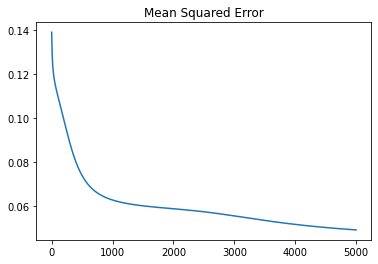

In [ ]:
results.mse.plot(title="Mean Squared Error")

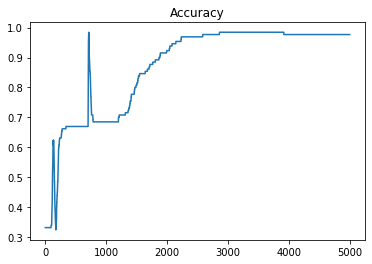

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.95


Our goal with backpropagation is to update each of the weights in the network so that predicted output will be closer to the actual output